In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random
from performance_analysis import MTOW

In [28]:
def T1(v):
    return -0.0427*(v**2) - 0.2933*v + 59.18
def T2(v):
    return -0.0340*(v**2) - 0.2335*v + 64.452
def T3(v):
    return -0.0279*(v**2) - 0.1915*v + 62.86

In [29]:
#Hiper-parameters definition:
population = {}
generations = []
best_fitness = []
mean_fitness = []
best_individuals = []

generations_number = 5
pop_size = 2
gens_number = 7
mutation_rate = 0.05

chordr_min, chordr_max = 0.45, 0.55
chordt_min, chordt_max = 0.27, 0.4
constantb_min, constantb_max = 0.5, 1
totalspan_min, totalspan_max = 1, 2
offsett_min, offsett_max = 0, 0.08
airfoils = ['UruA10412', 'E423']
thrust = [T1, T2, T3]

h_obs = 0.85 # 0.15m more than the real obstacle
S_max = 55 #m
velocity = 18
density = 1.117 #densidade do ar
viscosity = 0.0000184

In [30]:
def fitness(x):
    wing = [float(x[0]), float(x[1]), float(x[2]), float(x[3]), 0, float(x[4]), x[5], x[6]]

    mtow, takeoff_dist, ew = MTOW(wing, S_max, h_obs, density, velocity, viscosity)
    payload = mtow - ew
    payload_ratio = payload/ew
    
    return (payload_ratio)

In [31]:
wing = [0.46488743814153977, 0.27567062350266525, 1.5, 0.5, 0, 0.06950879651140063, 'UruA10412', T2]
MTOW(wing, S_max, h_obs, density, velocity, viscosity)

(27.000000000000135, 54.599991985223205, 2.6474120178700824)

In [32]:
def best_individual(population):
    best = 0
    for i in range(pop_size):
        if population[i]['fitness'] > best:
            best = population[i]['fitness']
            indv = population[i]
    return indv

def worst_individual(population):
    worst = 1000
    for i in range(pop_size):
        if population[i]['fitness'] < worst:
            worst = population[i]['fitness']
            index = i
    return index

def best_fit(population):
    best = 0
    for i in range(pop_size):
        if population[i]['fitness'] > best:
            best = population[i]['fitness']
    return best

def mean_fit(population):
    mean = []
    for i in range(pop_size):
        mean.append(population[i]['fitness'])
    return np.mean(mean)

def selection():
    ev = []
    for i in range(pop_size):
        ev.append(population[i]['fitness'])
    mean_ev = np.mean(ev)
    if mean_ev != 0:
        ev = ev/mean_ev
    prob = np.exp(-1*ev)
    cumulative = np.cumsum(prob)
    decision = sum(prob) * np.random.rand()
    ind = np.argwhere(decision <= cumulative)
    return ind[0][0]

In [33]:
for i in range(pop_size):
    population[i] = {'weights': None, 'fitness': None}
for i in range(pop_size):
    population[i]['weights'] = [
        np.random.uniform(chordr_min, chordr_max),
        np.random.uniform(chordt_min, chordt_max),
        np.random.uniform(constantb_min, constantb_max),
        np.random.uniform(totalspan_min - constantb_min, totalspan_max - constantb_max),
        np.random.uniform(offsett_min, offsett_max),
        random.choice(airfoils),
        random.choice(thrust)]
    population[i]['fitness'] = fitness(population[i]['weights'])

    print(population[i])

best_indiv = best_individual(population)
generations.append(population)
best_fitness.append(best_fit(population))
mean_fitness.append(mean_fit(population))
best_individuals.append(best_indiv)

{'weights': [0.47847515721208544, 0.3437331049731699, 0.5511480979967642, 0.8463428386118773, 0.06318417598777745, 'UruA10412', <function T3 at 0x00000215A38A9C60>], 'fitness': 11.20750271480211}
{'weights': [0.5281274839517158, 0.30358324786878615, 0.7987722737495482, 0.8937022530035503, 0.07984841810940317, 'UruA10412', <function T2 at 0x00000215A38A9300>], 'fitness': 9.837998196683378}


In [34]:
count = 1
for i in range (generations_number):
    print('\nBest individual of previous generation', best_indiv)
    childs = []
    for i in range(pop_size):
        parent1 = population[selection()]
        parent2 = population[selection()]
        cutpoint = round(np.random.uniform(0, gens_number))
        child = np.array(parent1['weights'][0:cutpoint])
        child = np.append(child, parent2['weights'][cutpoint:])
        childs.append(child)

    for i in range(pop_size):
        if np.random.uniform(0,1) < mutation_rate:
            childs[i][0] = np.random.uniform(chordr_min, chordr_max)
        if np.random.uniform(0,1) < mutation_rate:
            childs[i][1] = np.random.uniform(chordt_min, chordt_max)
        if np.random.uniform(0,1) < mutation_rate:
            childs[i][2] = np.random.uniform(constantb_min, constantb_max)
        if np.random.uniform(0,1) < mutation_rate:
            childs[i][2] = np.random.uniform(totalspan_min - constantb_min, totalspan_max - constantb_max)
        if np.random.uniform(0,1) < mutation_rate:
            childs[i][3] = np.random.uniform(offsett_min, offsett_max)
        if np.random.uniform(0,1) < mutation_rate:
            childs[i][4] = random.choice(airfoils)
        if np.random.uniform(0,1) < mutation_rate:
            childs[i][5] = random.choice(thrust)

    for i in range(pop_size):
        population[i] = {'weights': None, 'fitness': None}
    for i in range(pop_size):
        population[i]['weights'] = np.array(childs[i])
        population[i]['fitness'] = fitness(population[i]['weights'])

    print('\nPopulation before elitism:', population)

    worst_indiv = worst_individual(population)
    population[worst_indiv] = best_indiv
    best_indiv = best_individual(population)
    best_individuals.append(best_indiv)

    print("\n\nGeneration:", count, "\nPopulation:", population)
    generations.append(population)
    best_fitness.append(best_fit(population))
    mean_fitness.append(mean_fit(population))
    count+=1


Best individual of previous generation {'weights': [0.47847515721208544, 0.3437331049731699, 0.5511480979967642, 0.8463428386118773, 0.06318417598777745, 'UruA10412', <function T3 at 0x00000215A38A9C60>], 'fitness': 11.20750271480211}

Population before elitism: {0: {'weights': array([0.47847515721208544, 0.3437331049731699, 0.7987722737495482,
       0.8937022530035503, 0.07984841810940317, 'UruA10412',
       <function T2 at 0x00000215A38A9300>], dtype=object), 'fitness': 10.072610777262245}, 1: {'weights': array([0.47847515721208544, 0.3437331049731699, 0.7987722737495482,
       0.8937022530035503, 0.07984841810940317, 'UruA10412',
       <function T2 at 0x00000215A38A9300>], dtype=object), 'fitness': 10.072610777262245}}


Generation: 1 
Population: {0: {'weights': [0.47847515721208544, 0.3437331049731699, 0.5511480979967642, 0.8463428386118773, 0.06318417598777745, 'UruA10412', <function T3 at 0x00000215A38A9C60>], 'fitness': 11.20750271480211}, 1: {'weights': array([0.478475157

KeyboardInterrupt: 

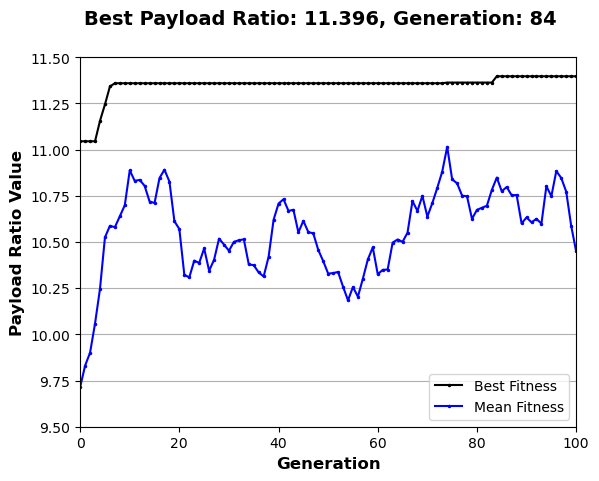

In [ ]:
x_axis = []

for i in range(0, len(generations)):
    x_axis.append(i)
plt.plot(x_axis, best_fitness, marker='.', color='black', markersize=3, label='Best Fitness')
plt.plot(x_axis, mean_fitness, marker='.', color='blue', markersize=3, label='Mean Fitness')
plt.xlabel('Generation', weight='bold', fontsize='12')
plt.ylabel('Payload Ratio Value', weight='bold', fontsize='12')
plt.suptitle('Best Payload Ratio: 11.396, Generation: 84', weight='bold', fontsize='14')
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.axis([0, 100, 9.5, 11.5])
plt.show()

In [ ]:
best_generation = best_fitness.index(max(best_fitness))
best_ind = best_individual(generations[best_generation])
print('The best individual is found in generation', best_generation, 'and its evaluation is', max(best_fitness))

The best individual is found in generation 84 and its evaluation is 11.396285582880362


In [ ]:
best_fitness

[11.04456044702851,
 11.04456044702851,
 11.04456044702851,
 11.04456044702851,
 11.155318100952478,
 11.24374767189836,
 11.341202531460114,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.358594942634197,
 11.35859494263419

In [ ]:
best_individuals

[{'weights': [0.46488743814153977,
   0.27567062350266525,
   0.6414207080983061,
   0.06121548793991315,
   'UruA10412',
   <function __main__.T3(v)>],
  'fitness': 11.04456044702851},
 {'weights': [0.46488743814153977,
   0.27567062350266525,
   0.6414207080983061,
   0.06121548793991315,
   'UruA10412',
   <function __main__.T3(v)>],
  'fitness': 11.04456044702851},
 {'weights': array([0.46488743814153977, 0.27567062350266525, 0.6414207080983061,
         0.06950879651140063, 'UruA10412',
         <function T3 at 0x0000027E25FC4CA0>], dtype=object),
  'fitness': 11.04456044702851},
 {'weights': array([0.46488743814153977, 0.27567062350266525, 0.6414207080983061,
         0.06950879651140063, 'UruA10412',
         <function T3 at 0x0000027E25FC4CA0>], dtype=object),
  'fitness': 11.04456044702851},
 {'weights': array([0.46488743814153977, 0.27567062350266525, 0.5205455692589661,
         0.03215515813281233, 'UruA10412',
         <function T3 at 0x0000027E25FC4CA0>], dtype=object),
 